<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

In [ ]:
import pandas as pd

DATA_FILE = './data/chipotle.tsv'

In [ ]:
df = pd.read_csv(DATA_FILE, sep='\t')
df

---

## Intermediate Level

### Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [ ]:
df.dtypes
df['item_price'] = df['item_price'].str.replace('$', '')
df['item_price'] = df['item_price'].str.replace("'", '')
df['item_price'] = df['item_price'].astype(float)

In [ ]:
df['total_price'] = df['quantity'] * df['item_price']

In [ ]:
val_of_orders = df.groupby('order_id')['total_price'].sum()

val_of_orders.mean()

### Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [ ]:
unique_sodas = []
def store_soda(item):
    item = item[1:-1]
    if item not in unique_sodas:
        unique_sodas.append(item)
    return item

mask = (df['item_name'] == 'Canned Soda') | (df['item_name'] == "Canned Soft Drink")
df[mask]['choice_description'].apply(store_soda)

unique_sodas

---

## Advanced Level


### Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [191]:
import re

df_clean = df.dropna()
topping_count = []

def get_toppings(items):
    x = re.findall('(?<=\[).+?(?=\])', items[1:-1])
    if len(x) == 1:
        topping_count.append(len(x[0].split(',')))
    elif len(x) == 2:
        topping_count.append(len(x[1].split(',')))
    return items

df_clean[df_clean['item_name'] == 'Steak Burrito']['choice_description'].apply(get_toppings)

7       [Tomatillo Red Chili Salsa, [Fajita Vegetables...
9       [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...
31      [[Roasted Chili Corn Salsa (Medium), Fresh Tom...
43      [Fresh Tomato Salsa, [Rice, Pinto Beans, Chees...
46      [Tomatillo-Red Chili Salsa (Hot), [Rice, Fajit...
                              ...                        
4546    [Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]
4607    [Tomatillo Green Chili Salsa, [Rice, Cheese, S...
4610    [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...
4617    [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...
4618    [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...
Name: choice_description, Length: 368, dtype: object

In [192]:
sum = 0
for count in topping_count:
    sum = sum + count
print("average num toppings: ", sum / len(topping_count))

average num toppings:  4.424157303370786


In [193]:
df_clean[df_clean['item_name'] == 'Steak Burrito']

,order_id,quantity,item_name,choice_description,item_price,total_price
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25
31,16,1,Steak Burrito,"[[Roasted Chili Corn Salsa (Medium), Fresh Tom...",8.99,8.99
43,20,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Chees...",11.75,11.75
46,21,1,Steak Burrito,"[Tomatillo-Red Chili Salsa (Hot), [Rice, Fajit...",8.99,8.99
...,...,...,...,...,...,...
4546,1807,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]",9.25,9.25
4607,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, S...",11.75,11.75
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75


### Create a dict. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [194]:
order_list = []

def get_key(item):
    if item not in order_list:
        order_list.append(item)
    return item

df[df['item_name'].str.contains('Chips')]['item_name'].apply(get_key)

order_list

['Chips and Fresh Tomato Salsa',
 'Chips and Tomatillo-Green Chili Salsa',
 'Side of Chips',
 'Chips and Guacamole',
 'Chips and Tomatillo Green Chili Salsa',
 'Chips',
 'Chips and Tomatillo Red Chili Salsa',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Chips and Tomatillo-Red Chili Salsa',
 'Chips and Mild Fresh Tomato Salsa']

In [196]:
quantity_list = []
for i in order_list:
    quantity_list.append(df[df['item_name'] == i]['quantity'].sum())

In [197]:
dict(zip(order_list, quantity_list))

{'Chips and Fresh Tomato Salsa': 130,
 'Chips and Tomatillo-Green Chili Salsa': 33,
 'Side of Chips': 110,
 'Chips and Guacamole': 506,
 'Chips and Tomatillo Green Chili Salsa': 45,
 'Chips': 230,
 'Chips and Tomatillo Red Chili Salsa': 50,
 'Chips and Roasted Chili-Corn Salsa': 18,
 'Chips and Roasted Chili Corn Salsa': 23,
 'Chips and Tomatillo-Red Chili Salsa': 25,
 'Chips and Mild Fresh Tomato Salsa': 1}

---

## Find something interesting


In [198]:
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
total_price              0
dtype: int64

<AxesSubplot:>

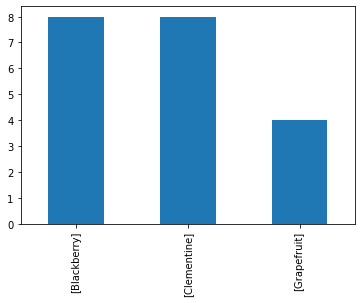

In [199]:
df_clean.isnull().sum()

mask = df_clean['item_name'] == 'Izze'

df_clean[mask]['choice_description'].value_counts().plot(kind='bar')

<AxesSubplot:>

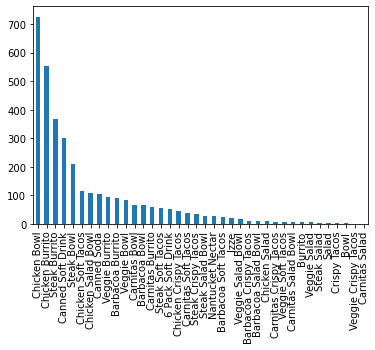

In [203]:
df_clean['item_name'].value_counts().plot(kind='bar')

<AxesSubplot:>

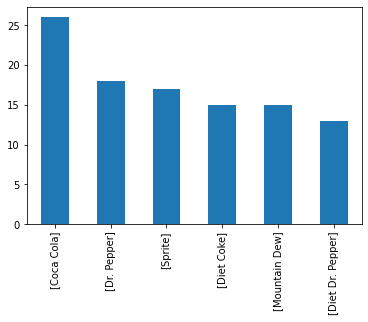

In [205]:
mask = df_clean['item_name'] == 'Canned Soda'

df_clean[mask]['choice_description'].value_counts().plot(kind='bar')

In [208]:
df_clean.groupby('quantity')['item_name'].describe()

,count,unique,top,freq
quantity,,,,
1,3191,38,Chicken Bowl,693
2,162,20,Chicken Bowl,31
3,17,8,Canned Soft Drink,7
4,6,3,Canned Soft Drink,3


In [217]:
df_clean.groupby('order_id')['item_name'].value_counts()

order_id  item_name         
1         Izze                  1
          Nantucket Nectar      1
2         Chicken Bowl          1
3         Chicken Bowl          1
4         Steak Burrito         1
                               ..
1830      Veggie Burrito        1
1831      Carnitas Bowl         1
1832      Chicken Soft Tacos    1
1833      Steak Burrito         2
1834      Chicken Salad Bowl    3
Name: item_name, Length: 3065, dtype: int64

In [219]:
mask = df_clean['item_name'] == 'Canned Soda'

df_clean.groupby(mask)['quantity'].describe()

,count,mean,std,min,25%,50%,75%,max
item_name,,,,,,,,
False,3272.0,1.058680,0.273531,1.0,1.0,1.0,1.0,4.0
True,104.0,1.211538,0.476090,1.0,1.0,1.0,1.0,4.0
